<a href="https://colab.research.google.com/github/shakil1819/CSE442-Machine-Learning-Sessional/blob/main/Week%203%20--%20K-Means%20Clustering/Lec3_Kmeans_Unsupervised_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/OnlineRetail.csv",encoding="ISO-8859-1")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


In [ ]:
df.shape

(541909, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
df=df.dropna()
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
df.shape

(406829, 8)

In [ ]:
df['CustomerID']=df['CustomerID'].astype(str)

<ipython-input-13-d4b6fccbd77f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CustomerID']=df['CustomerID'].astype(str)


In [ ]:
df['Amount']=df['UnitPrice']*df['Quantity']
fm_m=df.groupby('CustomerID')['Amount'].sum()
fm_m=fm_m.reset_index()
fm_m.columns=['CustomerID','Spend_Amount']
fm_m.head()

<ipython-input-14-523d3fc75744>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Amount']=df['UnitPrice']*df['Quantity']


,CustomerID,Spend_Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [ ]:
fm_f=df.groupby('CustomerID')['InvoiceNo'].count()
fm_f=fm_f.reset_index()
fm_f.columns=['CustomerID','Frequency']
fm_f.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [ ]:
fm=pd.merge(fm_m,fm_f,on='CustomerID',how='inner')
fm.head()

,CustomerID,Spend_Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


Text(0.5, 0, 'Attributes')

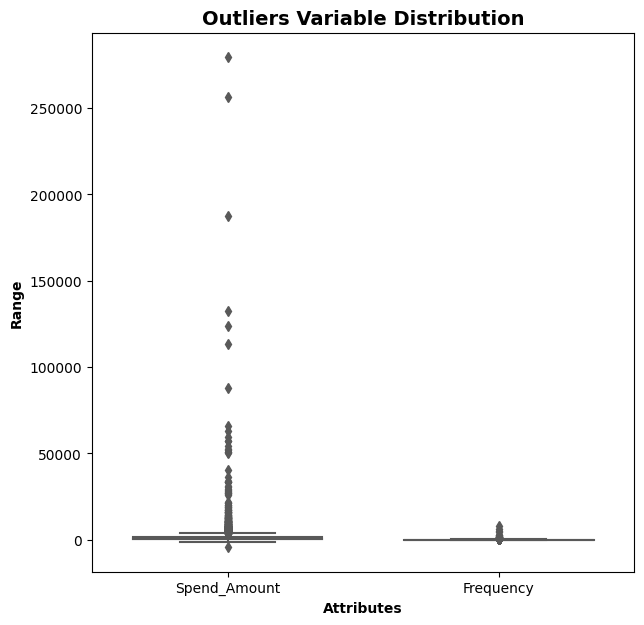

In [ ]:
attributes=['Spend_Amount','Frequency']
plt.rcParams['figure.figsize']=[7,7]
sns.boxplot(data=fm[attributes],orient="X",palette="Set2", whis=1.5,saturation=1,width=0.7)
plt.title("Outliers Variable Distribution",fontsize=14,fontweight='bold')
plt.ylabel("Range",fontweight='bold')
plt.xlabel("Attributes",fontweight='bold')


In [ ]:
fm.shape

(4372, 3)

In [ ]:
Q1=fm.Spend_Amount.quantile(0.25)
Q3=fm.Spend_Amount.quantile(0.75)
IQR=Q3-Q1
fm=fm[(fm.Spend_Amount>=Q1-1.5*IQR)& (fm.Spend_Amount<=Q3+1.5*IQR)]

Q1=fm.Frequency.quantile(0.25)
Q3=fm.Frequency.quantile(0.75)
IQR=Q3-Q1
fm=fm[(fm.Frequency>=Q1-1.5*IQR)& (fm.Frequency<=Q3+1.5*IQR)]



Text(0.5, 0, 'Attributes')

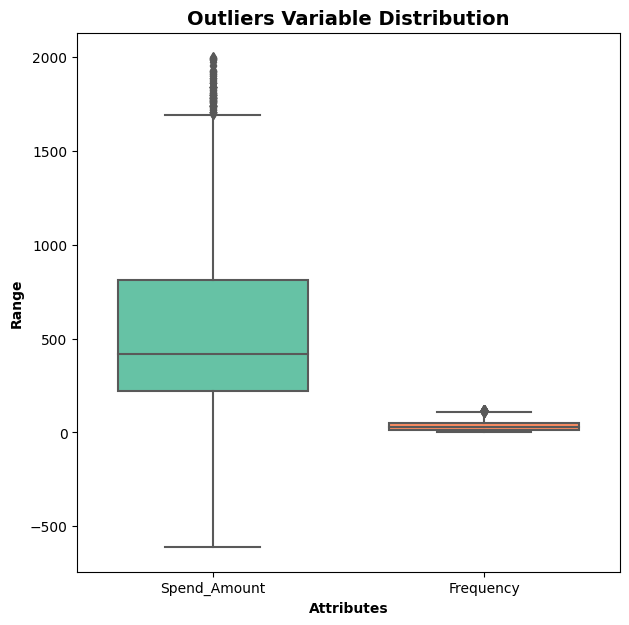

In [ ]:
attributes=['Spend_Amount','Frequency']
plt.rcParams['figure.figsize']=[7,7]
sns.boxplot(data=fm[attributes],orient="X",palette="Set2", whis=1.5,saturation=1,width=0.7)
plt.title("Outliers Variable Distribution",fontsize=14,fontweight='bold')
plt.ylabel("Range",fontweight='bold')
plt.xlabel("Attributes",fontweight='bold')


In [ ]:
fm.shape

(3216, 3)

In [ ]:
fm.describe()

,Spend_Amount,Frequency
count,3216.000000,3216.000000
mean,575.675275,35.774876
std,465.108135,28.828851
min,-611.860000,1.000000
25%,219.487500,13.000000
50%,418.465000,28.000000
75%,810.517500,52.000000
max,2000.860000,120.000000


In [ ]:
fm_df=fm[['Spend_Amount','Frequency']]
scaler=StandardScaler()
fm_df_scaled=scaler.fit_transform(fm_df)
fm_df_scaled.shape

(3216, 2)

In [ ]:
fm_df_scaled

array([[-1.23791599, -1.17174729],
       [ 2.62681858, -0.16565413],
       [ 2.54147032,  1.29144631],
       ...,
       [-1.06412293, -0.99828295],
       [-0.8581603 , -0.79012574],
       [ 2.71291947,  1.18736771]])

In [ ]:
fm_df_scaled=pd.DataFrame(fm_df_scaled)
fm_df_scaled.columns=['Amount','Frequency']
fm_df_scaled.head()

,Amount,Frequency
0,-1.237916,-1.171747
1,2.626819,-0.165654
2,2.541470,1.291446
3,-0.518832,-0.651354
4,2.085290,2.054689


In [ ]:
fm_df_scaled.describe()

,Amount,Frequency
count,3.216000e+03,3.216000e+03
mean,1.414015e-16,1.115747e-16
std,1.000156e+00,1.000156e+00
min,-2.553643e+00,-1.206440e+00
25%,-7.659362e-01,-7.901257e-01
50%,-3.380606e-01,-2.697327e-01
75%,5.049981e-01,5.628961e-01
max,3.064677e+00,2.922011e+00


In [ ]:
track_inertia={}
silhouette={}
for k in range(2,11):
  kmeans=KMeans(n_clusters=k,init='k-means++',random_state=0)
  kmeans.fit(fm_df_scaled)
  track_inertia[k]=kmeans.inertia_
  silhouette[k]=silhouette_score(fm_df_scaled,kmeans.labels_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

<Axes: >

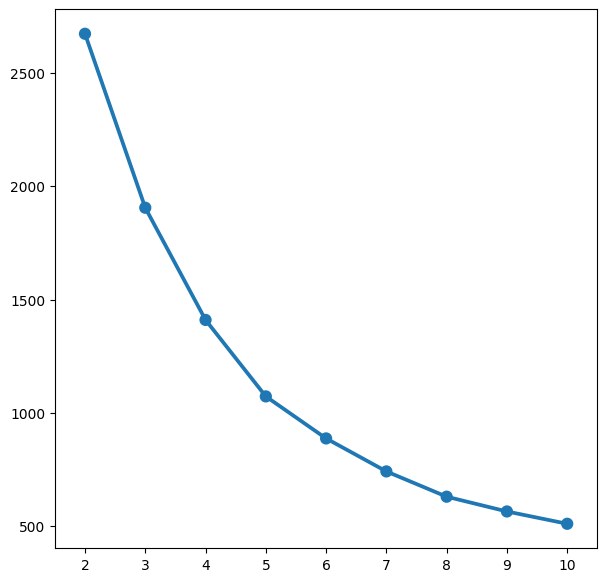

In [ ]:
sns.pointplot(x=list(track_inertia.keys()),y=list(track_inertia.values()))

<Axes: >

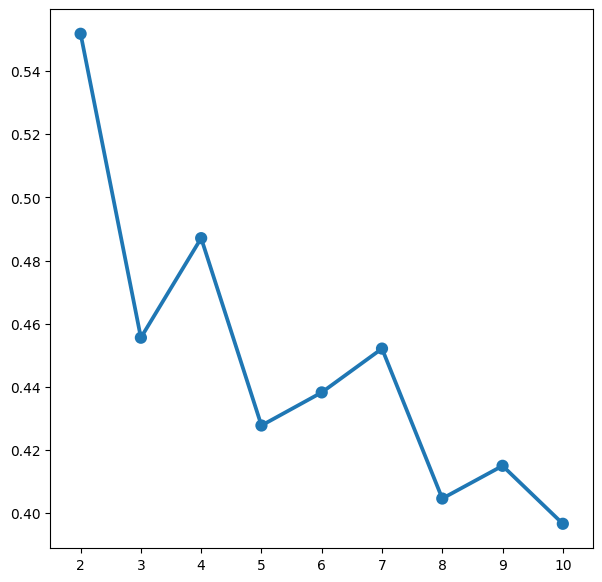

In [ ]:
sns.pointplot(x=list(silhouette.keys()),y=list(silhouette.values()))

In [ ]:
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
kmeans.fit(fm_df_scaled)
print("WCSS for k: %d and silhouette score: %f" %(kmeans.inertia_,silhouette_score(fm_df_scaled,kmeans.labels_)))


WCSS for k: 1905 and silhouette score: 0.455555


In [ ]:
kmeans.cluster_centers_

array([[-0.65737321, -0.70880355],
       [ 1.78250058,  1.40261198],
       [ 0.20870647,  0.49385973]])

In [ ]:
fm['Cluster_Id']=kmeans.labels_
fm.head()

,CustomerID,Spend_Amount,Frequency,Cluster_Id
0,12346.0,0.00,2,0
2,12348.0,1797.24,31,1
3,12349.0,1757.55,73,1
4,12350.0,334.40,17,0
5,12352.0,1545.41,95,1


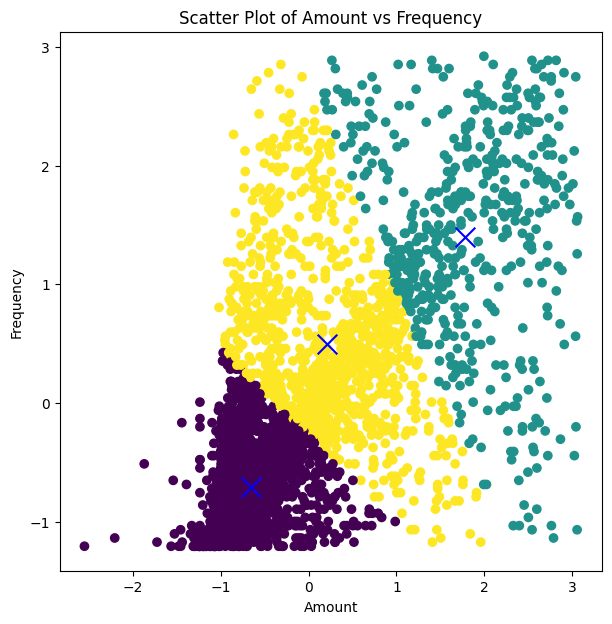

In [ ]:
plt.figure(figsize=(7,7))
plt.scatter(fm_df_scaled["Amount"],fm_df_scaled["Frequency"],c=kmeans.labels_,cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='blue',s=200,marker='x')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Scatter Plot of Amount vs Frequency')
plt.show()

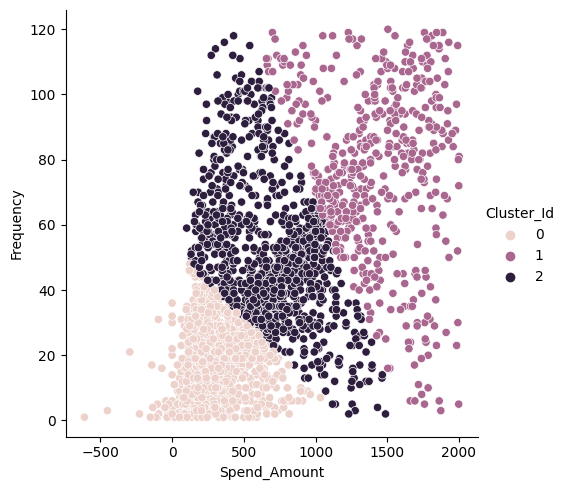

In [ ]:
sns.relplot(x='Spend_Amount',y='Frequency', data=fm,hue=fm['Cluster_Id'],height=5)

In [ ]:
new_data_point=[390.5,23]
new_data_point_scaled=scaler.transform([new_data_point])
predicted_cluster=kmeans.predict(new_data_point_scaled)
print(f"The new data point belongs to cluster {predicted_cluster[0]}")

The new data point belongs to cluster 0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
